In [10]:
%matplotlib notebook
import numpy as np
import h5py
import matplotlib
##matplotlib.use('Qt4Agg')
#matplotlib.use('TkAgg')
##%matplotlib notebook
import matplotlib.pyplot as plt
import sys
import scipy
from scipy import optimize
#from scipy.interpolate import interp1d

#sys.path.insert(0, '../source/SwissFEL_BERNINA_20181820/src/')
#import analysis
#from analysis import *
%matplotlib inline

In [11]:
def rate_model(initial_vals, k, J, V, t):
    '''
    Inputs:
       initial_vals is an array of values and each element corresponds to one group
       - initial_vals[0]: is the initial water fraction
       - initial_vals[1]: is the initial marbles fraction
       - initial_vals[2]: is the initial blobs fraction
       - initial_vals[3]: is the initial fractured fraction
       t is the time array in ms with the steps of dt
       k is an array of rates, 
       - k[0] is from marbles to blobs,
       - k[1] is from blobs to fractured,
       - k[2] is from marbles to fractured.
       J is the nucleation rate in 1/m^3s^1 at the coldest temperature (highest value)
       V is the volume of the droplet in m^3*s/ms
    --------------------------------
    Outputs:
       fractions of different droplet shapes as a function of time
    '''
    water = np.zeros(len(t))
    marbles = np.zeros(len(t))
    blobs = np.zeros(len(t))
    fractured = np.zeros(len(t))
    dwdt = np.zeros(len(t))
    dmdt = np.zeros(len(t))
    dbdt = np.zeros(len(t))
    dcdt = np.zeros(len(t))
    dt = t[1] - t[0]
    for i in range(len(t)):
        if i == 0:
            water[i] = 1
            marbles[i] = 0
            blobs[i] = 0
            fractured[i] = 0
        else:
            water[i] = water[i-1] + dwdt[i-1]*dt
            marbles[i] = marbles[i-1] + dmdt[i-1]*dt
            blobs[i] = blobs[i-1] + dbdt[i-1]*dt
            fractured[i] = fractured[i-1] + dcdt[i-1]*dt
            dwdt[i] = -J*V*water[i] # water
            dmdt[i] = J*V*water[i] - (k[0] + k[2])*marbles[i] # marbles
            dbdt[i] = k[0]*marbles[i] - k[1]*blobs[i] # blobs
            dcdt[i] = k[2]*marbles[i] + k[1]*blobs[i] # fractured
    return(water, marbles, blobs, fractured)

In [12]:
time = np.linspace(0, 2.0, num=2000)
init = np.array([1,0,0,0])
k_vals = np.array([7.488073, 0.8920651, 1.74072257])
w,m,b,f = rate_model(init, k_vals, 3.935647315309867e+18, 3.13e-18, time)


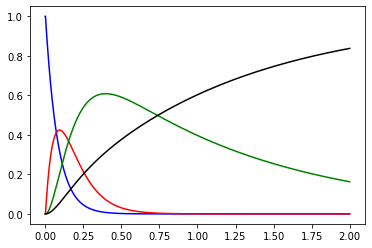

In [13]:
plt.figure()
plt.plot(time, w, 'b')
plt.plot(time, m, 'r')
plt.plot(time, b, 'g')
plt.plot(time, f, 'k')